In [1]:
import numpy as np
from scipy.stats import norm, multivariate_normal, uniform

import matplotlib.pyplot as plt

## Gibbs example

Example of subsection 11.1 of BDA3.

In this  example we want to simulate from the distribution:
$$\begin{pmatrix}\theta_1 \\ \theta_2\end{pmatrix}\Big|Y\sim\textsf{Normal}\left(\begin{pmatrix}y_1 \\ y_2\end{pmatrix},\begin{pmatrix}1 & \rho \\ \rho & 1\end{pmatrix}\right).$$

It can be shown that

$$\theta_1|\theta_2,Y \sim\textsf{Normal}(y_1+\rho(\theta_2-y_2),1-\rho^2)$$

$$\theta_2|\theta_1,Y \sim\textsf{Normal}(y_2+\rho(\theta_1-y_1),1-\rho^2)$$

In [2]:
Y1, Y2 = 0, 0
Rho = 0.8

Theta1SupVec = []
Theta2SupVec = []

np.random.seed(111)

for i in [0,1,2,3]:

    if i == 0:
        Theta1, Theta2 = -3.5, -3.5
    elif i==1:
        Theta1, Theta2 = -3.5, 3.5
    elif i==2:
        Theta1, Theta2 = 3.5, -3.5
    else:
        Theta1, Theta2 = 3.5, 3.5

    Theta1Vec = [Theta1]
    Theta2Vec = [Theta2]

    for _ in range(500):
        Theta1New = norm.rvs(size=1, loc=Y1+Rho*(Theta2-Y2), scale=np.sqrt(1-Rho**2))[0]
        Theta1Vec.append(Theta1New)
        Theta2Vec.append(Theta2)
        Theta1 = Theta1New

        Theta2New = norm.rvs(size=1, loc=Y2+Rho*(Theta1-Y1), scale=np.sqrt(1-Rho**2))[0]
        Theta2Vec.append(Theta2New)
        Theta1Vec.append(Theta1)
        Theta2 = Theta2New

    Theta1SupVec.append(Theta1Vec)
    Theta2SupVec.append(Theta2Vec)

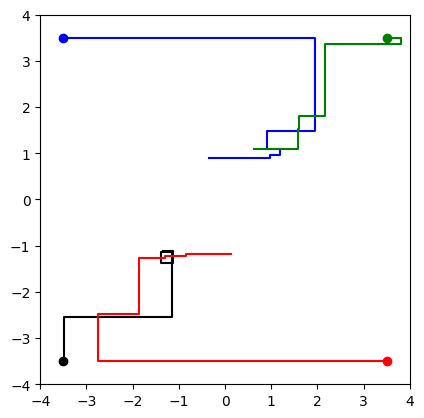

In [3]:
plt.plot(Theta1SupVec[0][:10], Theta2SupVec[0][:10], color='k')
plt.plot(Theta1SupVec[1][:10], Theta2SupVec[1][:10], color='b')
plt.plot(Theta1SupVec[2][:10], Theta2SupVec[2][:10], color='r')
plt.plot(Theta1SupVec[3][:10], Theta2SupVec[3][:10], color='g')

plt.scatter([-3.5], [-3.5], color='k')
plt.scatter([-3.5], [3.5], color='b')
plt.scatter([3.5], [-3.5], color='r')
plt.scatter([3.5], [3.5], color='g')

plt.xlim(-4, 4)
plt.ylim(-4, 4)

ax = plt.gca()
ax.set_aspect('equal', 'box')

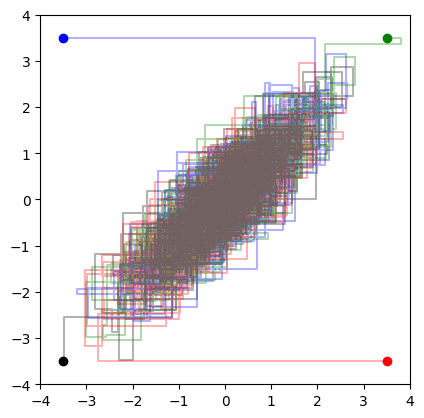

In [4]:
plt.plot(Theta1SupVec[0], Theta2SupVec[0], color='k', alpha=0.3)
plt.plot(Theta1SupVec[1], Theta2SupVec[1], color='b', alpha=0.3)
plt.plot(Theta1SupVec[2], Theta2SupVec[2], color='r', alpha=0.3)
plt.plot(Theta1SupVec[3], Theta2SupVec[3], color='g', alpha=0.3)

plt.scatter([-3.5], [-3.5], color='k')
plt.scatter([-3.5], [3.5], color='b')
plt.scatter([3.5], [-3.5], color='r')
plt.scatter([3.5], [3.5], color='g')

plt.xlim(-4, 4)
plt.ylim(-4, 4)

ax = plt.gca()
ax.set_aspect('equal', 'box')

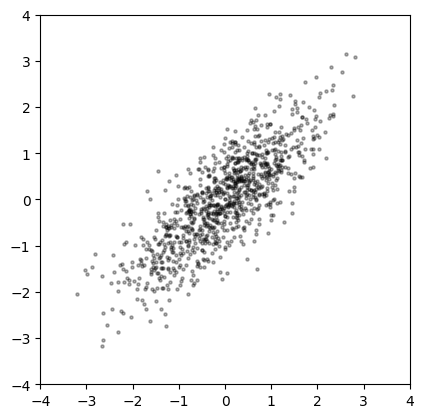

In [5]:
plt.scatter(Theta1SupVec[0][::2][251:], Theta2SupVec[0][::2][251:], s=5, color='k', alpha=0.3)
plt.scatter(Theta1SupVec[1][::2][251:], Theta2SupVec[1][::2][251:], s=5, color='k', alpha=0.3)
plt.scatter(Theta1SupVec[2][::2][251:], Theta2SupVec[2][::2][251:], s=5, color='k', alpha=0.3)
plt.scatter(Theta1SupVec[3][::2][251:], Theta2SupVec[3][::2][251:], s=5, color='k', alpha=0.3)

plt.xlim(-4, 4)
plt.ylim(-4, 4)

ax = plt.gca()
ax.set_aspect('equal', 'box')

## Metropolis example

Example of section 11.2.

In this example, the target density is the bivariate target normal, $\textsf{Normal}(\theta|0,I)$. The jumping distribution is also a bivariate normal, centered at the current iteration and scaled to 1/5 the size: $J_t(\theta^*|\theta^{t-1})=\textsf{Normal}(\theta^*|\theta^{t-1},0.2^2I)$. At each step we calculate the ratio $r=\textsf{Normal}(\theta^*|0,I)/\textsf{Normal}(\theta^{t-1}|0,I)$

In [6]:
ThetaSupVec = []

np.random.seed(111)

for i in [0,1,2,3, 4]:

    if i == 0:
        Theta0 = [-3.5, -3.5]
    elif i==1:
        Theta0 = [-3.5, 3.5]
    elif i==2:
        Theta0 = [3.5, -3.5]
    elif i==3:
        Theta0 = [3.5, 3.5]
    else:
        Theta0 = [0, 0]

    ThetaVec = [Theta0]

    for _ in range(1000):
        ThetaProposed = multivariate_normal.rvs(size=1, mean=Theta0, cov=0.04*np.eye(2))
        Ratio = multivariate_normal.pdf(ThetaProposed, mean=[0,0], cov=np.eye(2)) / multivariate_normal.pdf(Theta0, mean=[0,0], cov=np.eye(2))

        if Ratio > 1:
            ThetaNew = ThetaProposed
        else:
            if uniform.rvs(size=1)[0] < Ratio:
                ThetaNew = ThetaProposed
            else:
                ThetaNew = Theta0

        ThetaVec.append(ThetaNew)
        Theta0 = ThetaNew
        
    ThetaVec = np.array(ThetaVec).T
    ThetaSupVec.append(ThetaVec)

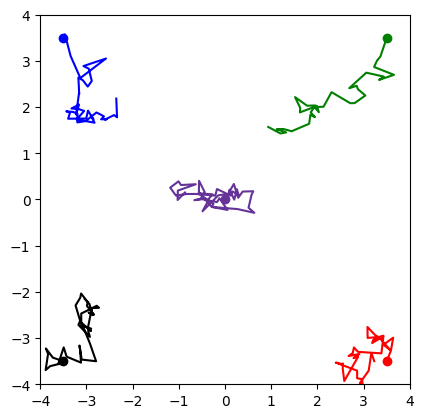

In [7]:
n = 50

plt.plot(ThetaSupVec[0][0][:n], ThetaSupVec[0][1][:n], color='k')
plt.plot(ThetaSupVec[1][0][:n], ThetaSupVec[1][1][:n], color='b')
plt.plot(ThetaSupVec[2][0][:n], ThetaSupVec[2][1][:n], color='r')
plt.plot(ThetaSupVec[3][0][:n], ThetaSupVec[3][1][:n], color='g')
plt.plot(ThetaSupVec[4][0][:n], ThetaSupVec[4][1][:n], color='rebeccapurple')

plt.scatter([-3.5], [-3.5], color='k')
plt.scatter([-3.5], [3.5], color='b')
plt.scatter([3.5], [-3.5], color='r')
plt.scatter([3.5], [3.5], color='g')
plt.scatter([0], [0], color='rebeccapurple')

plt.xlim(-4, 4)
plt.ylim(-4, 4)

ax = plt.gca()
ax.set_aspect('equal', 'box')

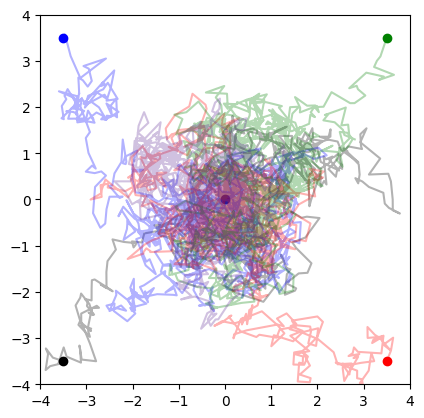

In [8]:
plt.plot(ThetaSupVec[0][0], ThetaSupVec[0][1], color='k', alpha=0.3)
plt.plot(ThetaSupVec[1][0], ThetaSupVec[1][1], color='b', alpha=0.3)
plt.plot(ThetaSupVec[2][0], ThetaSupVec[2][1], color='r', alpha=0.3)
plt.plot(ThetaSupVec[3][0], ThetaSupVec[3][1], color='g', alpha=0.3)
plt.plot(ThetaSupVec[4][0], ThetaSupVec[4][1], color='rebeccapurple', alpha=0.3)

plt.scatter([-3.5], [-3.5], color='k')
plt.scatter([-3.5], [3.5], color='b')
plt.scatter([3.5], [-3.5], color='r')
plt.scatter([3.5], [3.5], color='g')
plt.scatter([0], [0], color='rebeccapurple')

plt.xlim(-4, 4)
plt.ylim(-4, 4)

ax = plt.gca()
ax.set_aspect('equal', 'box')

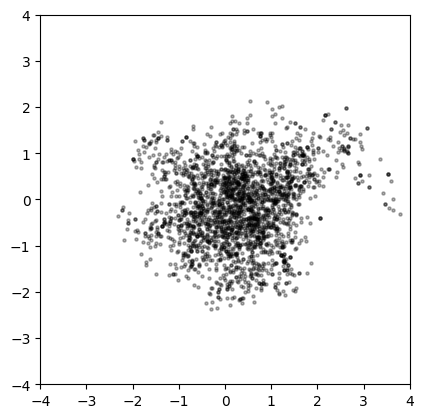

In [9]:
plt.scatter(ThetaSupVec[0][0][501:], ThetaSupVec[0][1][501:], s=5, color='k', alpha=0.3)
plt.scatter(ThetaSupVec[1][0][501:], ThetaSupVec[1][1][501:], s=5, color='k', alpha=0.3)
plt.scatter(ThetaSupVec[2][0][501:], ThetaSupVec[2][1][501:], s=5, color='k', alpha=0.3)
plt.scatter(ThetaSupVec[3][0][501:], ThetaSupVec[3][1][501:], s=5, color='k', alpha=0.3)
plt.scatter(ThetaSupVec[4][0][501:], ThetaSupVec[4][1][501:], s=5, color='k', alpha=0.3)

plt.xlim(-4, 4)
plt.ylim(-4, 4)

ax = plt.gca()
ax.set_aspect('equal', 'box')

In [10]:
Theta1Chain1 = ThetaSupVec[0][0][501:]
Theta1Chain2 = ThetaSupVec[1][0][501:]
Theta1Chain3 = ThetaSupVec[2][0][501:]
Theta1Chain4 = ThetaSupVec[3][0][501:]
Theta1Chain5 = ThetaSupVec[4][0][501:]

Theta2Chain1 = ThetaSupVec[0][1][501:]
Theta2Chain2 = ThetaSupVec[1][1][501:]
Theta2Chain3 = ThetaSupVec[2][1][501:]
Theta2Chain4 = ThetaSupVec[3][1][501:]
Theta2Chain5 = ThetaSupVec[4][1][501:]

LogPdfChain1 = multivariate_normal.logpdf(np.array([Theta1Chain1, Theta2Chain1]).T, mean=[0,0], cov=np.eye(2))
LogPdfChain2 = multivariate_normal.logpdf(np.array([Theta1Chain2, Theta2Chain2]).T, mean=[0,0], cov=np.eye(2))
LogPdfChain3 = multivariate_normal.logpdf(np.array([Theta1Chain3, Theta2Chain3]).T, mean=[0,0], cov=np.eye(2))
LogPdfChain4 = multivariate_normal.logpdf(np.array([Theta1Chain4, Theta2Chain4]).T, mean=[0,0], cov=np.eye(2))
LogPdfChain5 = multivariate_normal.logpdf(np.array([Theta1Chain5, Theta2Chain5]).T, mean=[0,0], cov=np.eye(2))

To determine if the chains have converged to the target distribution we can use the reduction potential for different statistics of interest, like the parameters themselves or the log-density. If it is near 1, then our chains have converged.

In [11]:
def PotentialReductionTheta1(n):
    m = 5

    Psi1, S1 = Theta1Chain1[:n].mean(), n / (n-1) * Theta1Chain1[:n].var()
    Psi2, S2 = Theta1Chain2[:n].mean(), n / (n-1) * Theta1Chain2[:n].var()
    Psi3, S3 = Theta1Chain3[:n].mean(), n / (n-1) * Theta1Chain3[:n].var()
    Psi4, S4 = Theta1Chain4[:n].mean(), n / (n-1) * Theta1Chain4[:n].var()
    Psi5, S5 = Theta1Chain5[:n].mean(), n / (n-1) * Theta1Chain5[:n].var()

    PsiAll = np.array([Psi1, Psi2, Psi3, Psi4, Psi5])
    SAll = np.array([S1, S2, S3, S4, S5])

    B = n / (m-1) * sum((PsiAll - PsiAll.mean())**2)
    W = SAll.mean()

    VarPsi = (n-1)/n * W + 1/n * B
    R = np.sqrt(VarPsi / W)

    return R

PotentialReductionTheta1 = np.vectorize(PotentialReductionTheta1)

In [12]:
PotentialReductionTheta1([5,50,100,500])

array([9.79926758, 2.53470148, 1.54199271, 1.16097499])

In [13]:
def PotentialReductionLogPdf(n):
    m = 5

    Psi1, S1 = LogPdfChain1[:n].mean(), LogPdfChain1[:n].var()
    Psi2, S2 = LogPdfChain2[:n].mean(), LogPdfChain2[:n].var()
    Psi3, S3 = LogPdfChain3[:n].mean(), LogPdfChain3[:n].var()
    Psi4, S4 = LogPdfChain4[:n].mean(), LogPdfChain4[:n].var()
    Psi5, S5 = LogPdfChain5[:n].mean(), LogPdfChain5[:n].var()

    PsiAll = np.array([Psi1, Psi2, Psi3, Psi4, Psi5])
    SAll = np.array([S1, S2, S3, S4, S5])

    B = n / (m-1) * sum((PsiAll - PsiAll.mean())**2)
    W = SAll.mean()

    VarPsi = (n-1)/n * W + 1/n * B
    R = np.sqrt(VarPsi / W)

    return R

PotentialReductionLogPdf = np.vectorize(PotentialReductionLogPdf)

In [14]:
PotentialReductionLogPdf([5,50,100,500])

array([8.5796656 , 2.83396448, 1.47669035, 1.05834132])

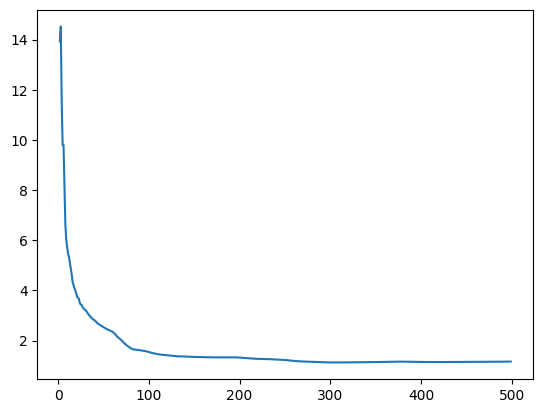

In [15]:
plt.plot(np.arange(2,500), PotentialReductionTheta1(np.arange(2,500)))

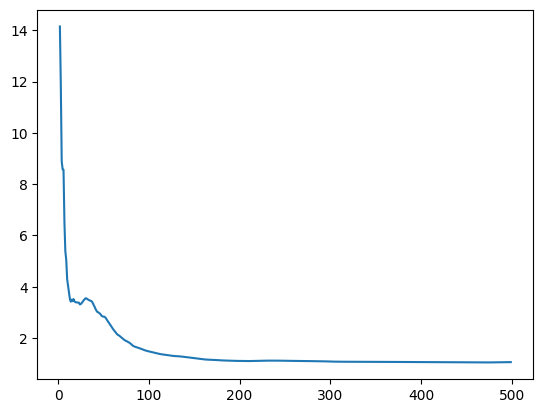

In [16]:
plt.plot(np.arange(2,500), PotentialReductionLogPdf(np.arange(2,500)))

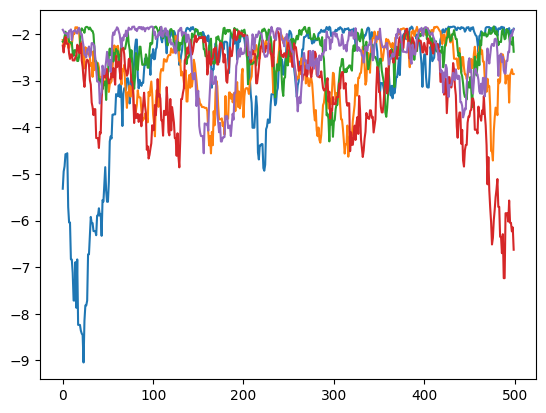

In [18]:
plt.plot(LogPdfChain1)
plt.plot(LogPdfChain2)
plt.plot(LogPdfChain3)
plt.plot(LogPdfChain4)
plt.plot(LogPdfChain5)

/home/dmitri/.local/lib/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


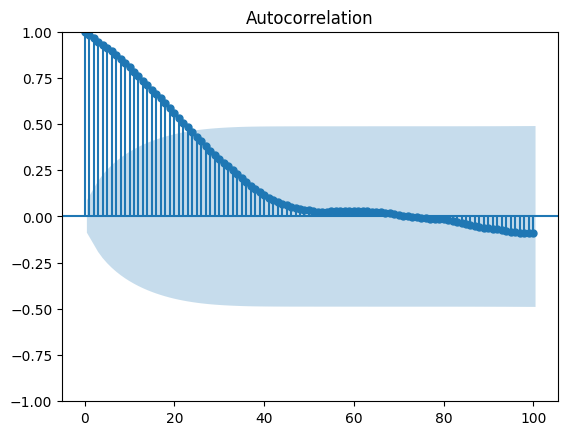

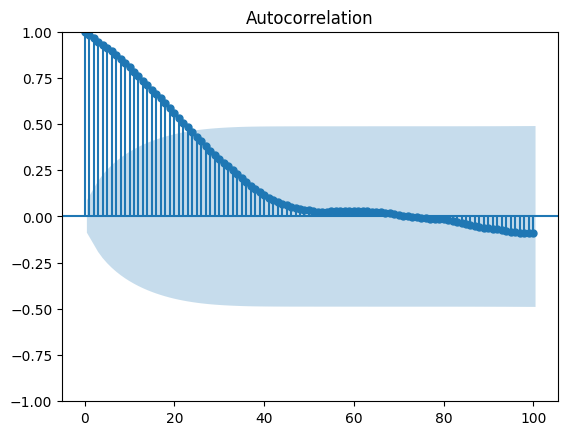

In [19]:
from statsmodels.graphics import tsaplots

tsaplots.plot_acf(Theta1Chain1, lags=100)


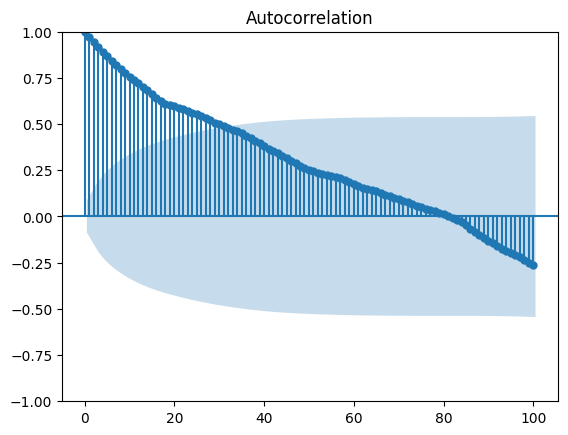

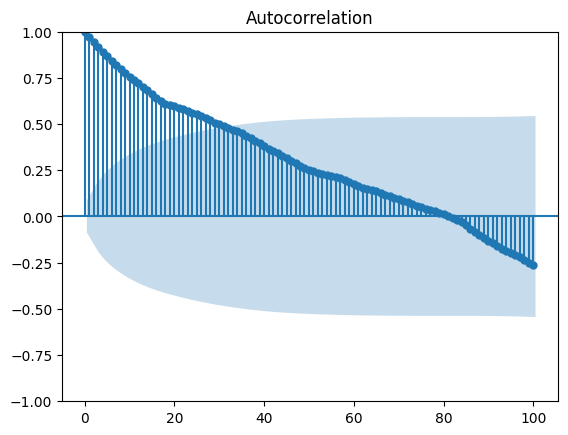

In [20]:
tsaplots.plot_acf(Theta2Chain1, lags=100)